#### Exploring datasets

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import warnings
import plotly.plotly as py
from plotly.graph_objs import *
from plotly.offline import *
warnings.filterwarnings("ignore")
init_notebook_mode(connected=True)

In [12]:
airlines=pd.read_csv("airlines.csv")
airports=pd.read_csv("airports.csv")
routes=pd.read_csv("routes.csv")
geo_routes=pd.read_csv("geo_routes.csv")
pop=pd.read_csv('population.csv')

In [13]:
pop=pop[pop.Year==2016].reset_index(drop=True)
pop=pop[46:].reset_index(drop=True)
pop.drop(['Year','Country Code'],axis=1,inplace=True)
pop.rename(columns={'Country Name':'Country','Value':'Population'},inplace=True)

In [14]:
airport_lat=airports['latitude'].tolist()
airport_lon=airports['longitude'].tolist()
names=airports.name.tolist()

##### Scatter plot of all airports in the World using Basemap 

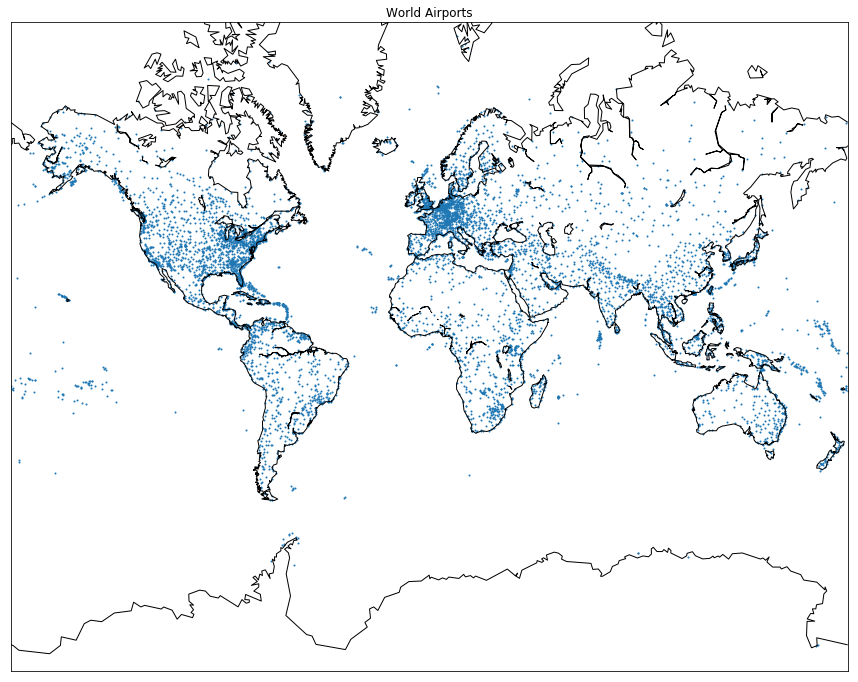

In [15]:
%matplotlib inline
fig=plt.figure(figsize=(15,15))
ax=fig.add_subplot(1,1,1)
ax.set_title("World Airports")
m = Basemap(projection='merc', llcrnrlat=-80, urcrnrlat=80, llcrnrlon=-180, urcrnrlon=180)
longitudes = airports["longitude"].tolist()
latitudes = airports["latitude"].tolist()
x, y = m(longitudes, latitudes)
m.scatter(x, y, s=1)
m.drawcoastlines()
plt.show()

##### Plotly to make interactive Scatter Map plot

#### Geographic plotting of air routes from an airport

Pass the Airport code of desired city into input prompt box to generate lines on the map from source airport to destination using Basemap library 

What is your favourite airport?blr


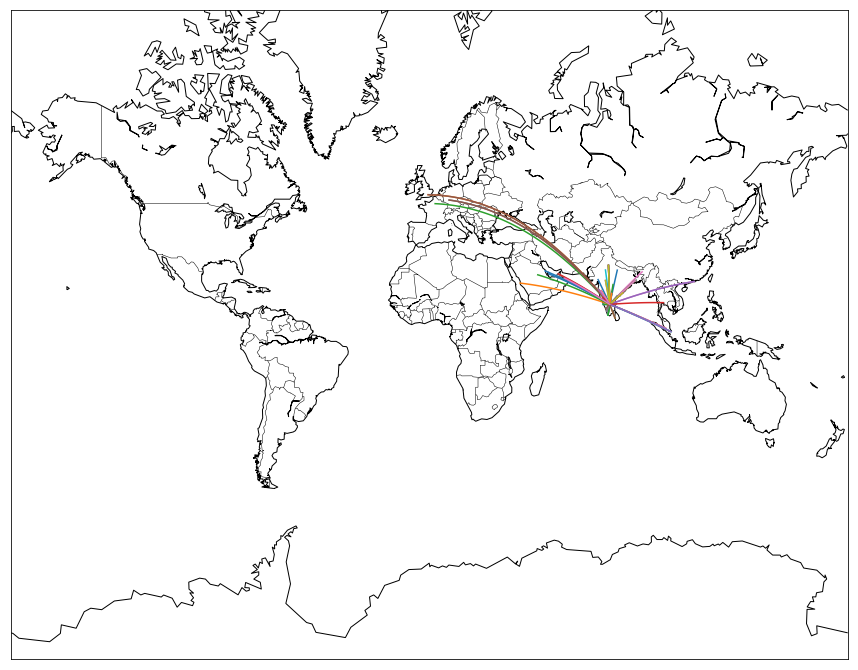

In [25]:
fig, ax = plt.subplots(figsize=(15,20))
m = Basemap(projection='merc', llcrnrlat=-80, urcrnrlat=80, llcrnrlon=-180, urcrnrlon=180)
m.drawcoastlines()
m.drawcountries()
sources=geo_routes.source.unique().tolist()
def create_great_circles(row):
    m.drawgreatcircle(row["start_lon"],row["start_lat"],row["end_lon"],row["end_lat"])

def city(city):
    city_air_routes=geo_routes[geo_routes["source"]==city]
    city_air_routes['diff_lon']=abs(city_air_routes["start_lon"]-city_air_routes["end_lon"])
    city_air_routes['diff_lat']=abs(city_air_routes["start_lat"]-city_air_routes["end_lat"])
    city_air_routes=city_air_routes[(city_air_routes['diff_lon']<180)&(city_air_routes['diff_lat']<180)]
    return city_air_routes
airport = input("What is your favourite airport?").upper()   
if airport in sources:
    city(airport).apply(create_great_circles,axis=1)
    plt.show()
else:
    print('\nPlease enter a valid three-letter Airport code')


##### Choropleth on World Map showing airports per million population of country

In [26]:
counts=airports.country.value_counts().reset_index()
counts.rename(columns={'index':'Country','country':'Airports'},inplace=True)
airports_counts=counts.merge(pop,how='left',on='Country')
airports_counts['Per Million']=(airports_counts.Airports/airports_counts.Population)*1000000
airports_counts=airports_counts[airports_counts['Per Million']<20]

In [27]:
data = dict(
        type = 'choropleth',
        locationmode = 'country names',
        locations = airports_counts['Country'],
        z = airports_counts['Per Million'],
        text = airports_counts['Country'],
        colorscale = 'Electric',
        reversescale = True,
        colorbar ={'title':'Per million'}
    )

layout = dict(
    title = 'Airports per million population',
    geo = dict(
        showframe = False,
        showcoastlines = False,
        projection = dict(
            type = 'Mercator'
        )
    )
)
choromap = go.Figure(data = [data],layout = layout)
iplot(choromap,validate=False)